In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

labels = ("A606", "A607", "A609", "A618", "A621")
first_day = datetime.strptime("2019-09-01", "%Y-%m-%d")


### Gráfico de temperatura média e anomalias

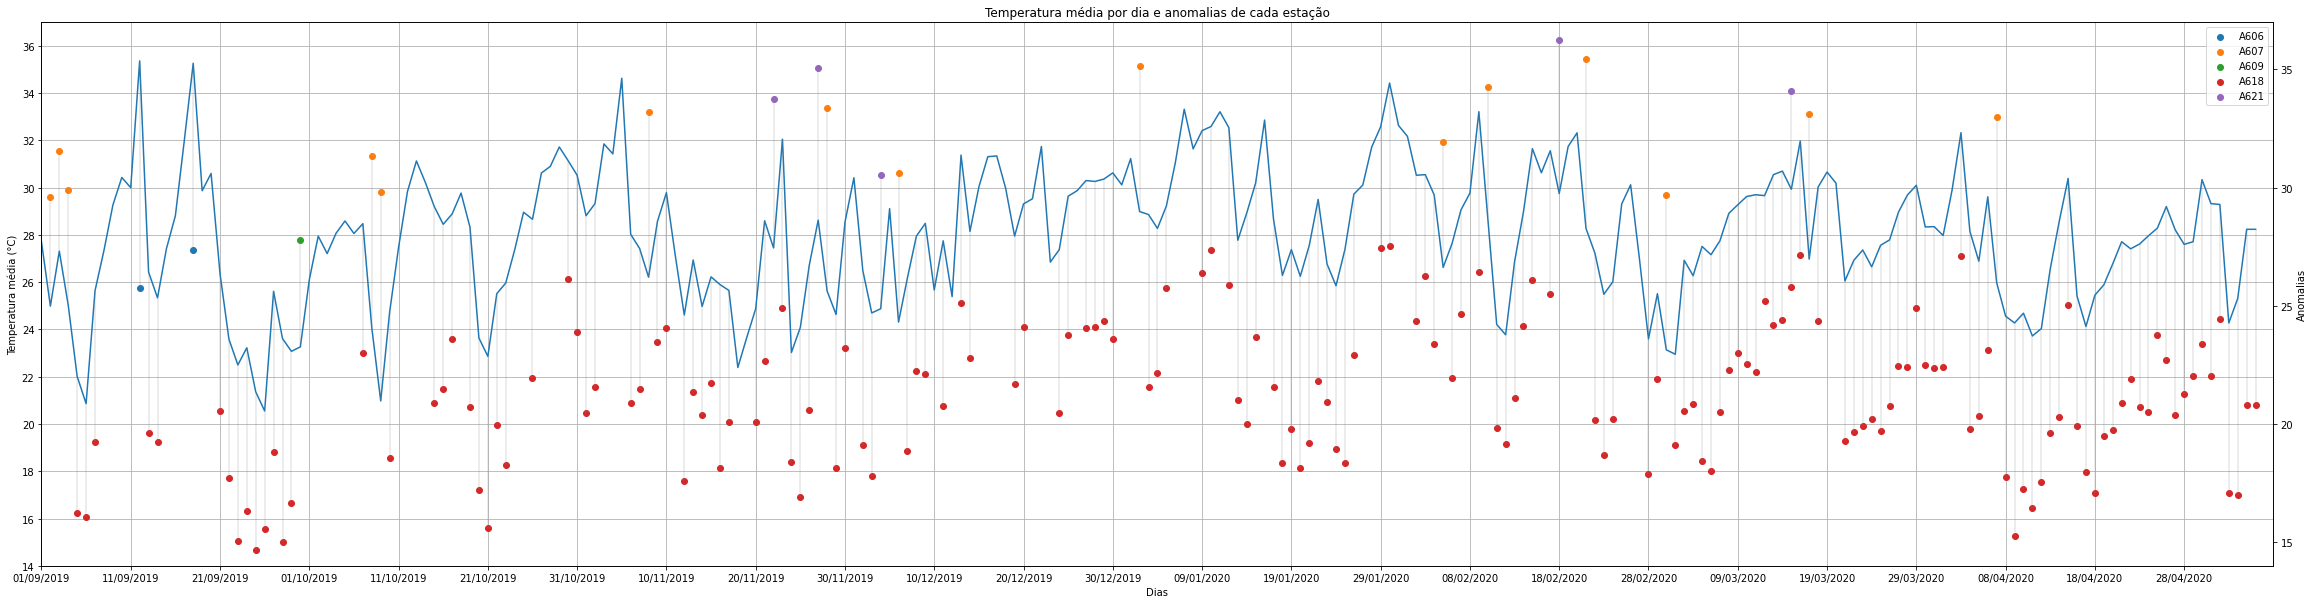

In [18]:
df_anomalias = pd.read_csv("./dados_csv/anomalia.csv", names=labels)
df_media = pd.read_csv("./dados_csv/media.csv",names=["Medias"])
x = tuple(
    (first_day + timedelta(days=i)).strftime("%d/%m/%Y")
    for i in range(len(df_anomalias["A606"]))
)

_, media_plot = plt.subplots(figsize=(40,10))
anomalias_plot = media_plot.twinx()

for label in labels:
    anomalias_plot.scatter(x, df_anomalias[label], label=label)

media_plot.plot(df_media)

media_plot.set_ylim(14, 37)
media_plot.set_xlim(0, 250)

media_plot.set_xlabel("Dias")
media_plot.set_ylabel("Temperatura média (°C)")
media_plot.set_title("Temperatura média por dia e anomalias de cada estação")
media_plot.set_xticks(np.arange(0, 250, 10))
media_plot.set_yticks(np.arange(14, 37, 2))

anomalias_plot.set_ylabel("Anomalias")
anomalias_plot.set_ylim(14, 37)
anomalias_plot.set_xlim(0, 250)
anomalias_plot.legend()

for idx in df_media.index:
    for label in labels:
        if df_anomalias[label].loc[idx]:
            plt.plot([idx, idx], [df_media["Medias"].loc[idx], df_anomalias[label].loc[idx]], 'gray', linewidth=.3)
        

media_plot.grid(True)
plt.show()

### Gráfico de temperatura média e anomalias sem a estação A618

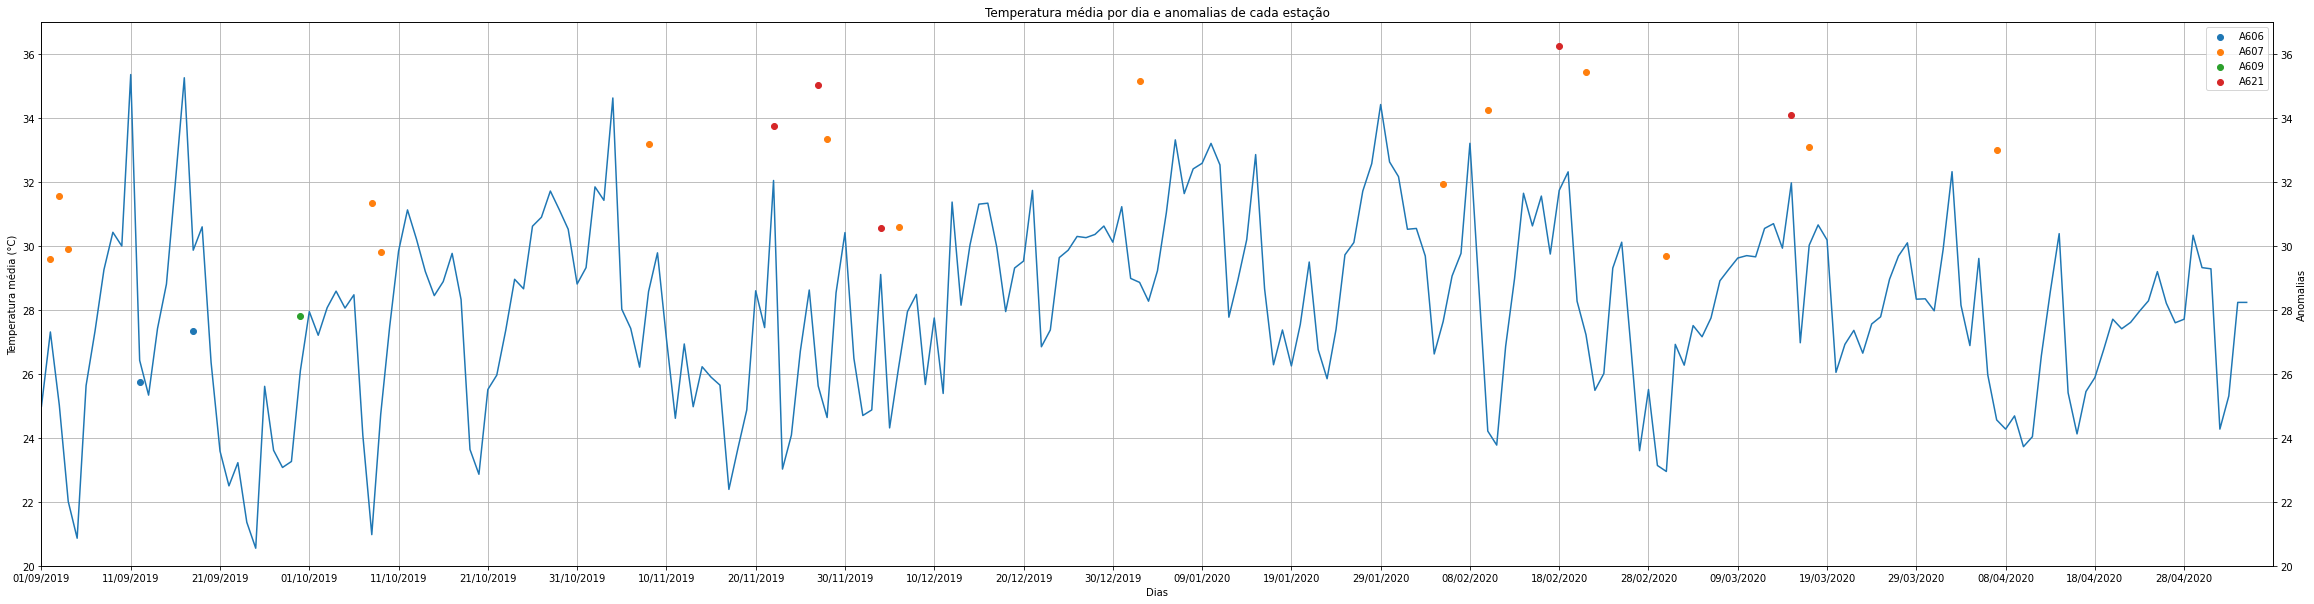

In [17]:
df_anomalias = pd.read_csv("./dados_csv/anomalia.csv", names=labels)
df_media = pd.read_csv("./dados_csv/media.csv")
x = tuple(
    (first_day + timedelta(days=i)).strftime("%d/%m/%Y")
    for i in range(len(df_anomalias["A606"]))
)

_, media_plot = plt.subplots(figsize=(40,10))
anomalias_plot = media_plot.twinx()

for label in  ("A606", "A607", "A609", "A621"):
    anomalias_plot.scatter(x, df_anomalias[label], label=label)

media_plot.plot(df_media)

media_plot.set_ylim(20, 37)
media_plot.set_xlim(0, 250)

media_plot.set_xlabel("Dias")
media_plot.set_ylabel("Temperatura média (°C)")
media_plot.set_title("Temperatura média por dia e anomalias de cada estação")
media_plot.set_xticks(np.arange(0, 250, 10))
media_plot.set_yticks(np.arange(20, 37, 2))

anomalias_plot.set_ylabel("Anomalias")
anomalias_plot.set_ylim(20, 37)
anomalias_plot.set_xlim(0, 250)
anomalias_plot.legend()

media_plot.grid(True)
plt.show()

### Gráfico de crença

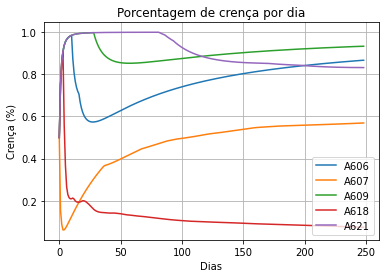

In [19]:
df = pd.read_csv("./dados_csv/crenca.csv", names=labels)
x = tuple(range(0, len(df["A606"])))

_, ax = plt.subplots()

for label in labels:
    plt.plot(x, df[label], label=label)

ax.set_xlabel("Dias")
ax.set_ylabel("Crença (%)")
ax.set_title("Porcentagem de crença por dia")
ax.legend()
ax.grid(True)

plt.show()

### Gráfico de descrença

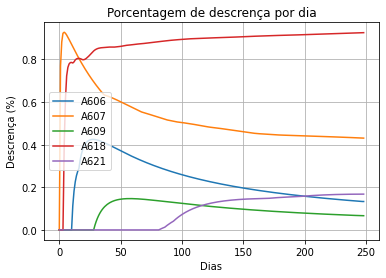

In [21]:
df = pd.read_csv("./dados_csv/descrenca.csv", names=labels)
x = tuple(range(0, len(df["A606"])))

_, ax = plt.subplots()

for label in labels:
    plt.plot(x, df[label], label=label)

ax.set_xlabel("Dias")
ax.set_ylabel("Descrença (%)")
ax.set_title("Porcentagem de descrença por dia")
ax.legend()
ax.grid(True)

plt.show()

### Gráfico de incerteza

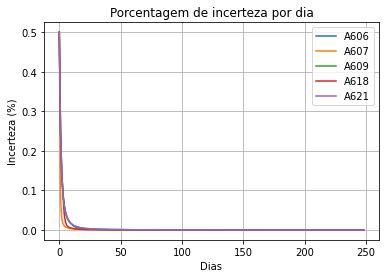

In [20]:
df = pd.read_csv("./dados_csv/incerteza.csv", names=labels)
x = tuple(range(0, len(df.A606)))

_, ax = plt.subplots()

for label in labels:
    plt.plot(x, df[label], label=label)

ax.set_xlabel("Dias")
ax.set_ylabel("Incerteza (%)")
ax.set_title("Porcentagem de incerteza por dia")
ax.legend()
ax.grid(True)

plt.show()
